In [4]:
!pip install mlxtend

In [5]:
import pandas as pd

df = pd.read_csv('Customer Preference Survey (Responses).csv')

In [6]:
df.head(5)

,Timestamp,playstation5,เครื่องทำขนมปัง,Ergonomic Wrist Rest,เครื่องอบผ้า,เครื่องชงกาแฟแคปซูล,เก้าอี้ LA-Z-Boy,เครื่องให้อาหารสัตว์อัตโนมัติ,บัตตาเลี่ยน,แก้วเก็บความเย็น,ลู่วิ่งออกกำลังกาย,Kindle,เครื่องซักผ้า,Bluetooth Speaker,ห้องน้ำแมวอัตโนมัติ,PS5,ทรายแมว,ลำโพง pixel,Logitech Mx Master 3 Mouse,ตุ๊กตา ty,น้ำพุแมว,Robot ดูดฝุ่น,Mechanical keyboard,Nintendo switch,หนังสือ python,gaming chair,Deskmat,Dew - ไฟโรเซ่,เทียนหอม jo malone,กระติกน้ำ 2 ลิตร,ที่นอน memory form,พลาสเตอร์บรรเทาปวด ตราเสือ,การ์ดจอ RTX 3080,ขนมจีนน้ำยาปู,Salmon Sashimi,จักรยานเสือหมอบ,ไฟแต่งห้องมินิมอล,External Harddisk,หม้อทอดไร้น้ํามัน,airpods,ยาดม,ไฟส่องหน้าไลฟ์สด
0,10/17/2021 17:43:38,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
1,10/17/2021 17:43:41,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,เคย,ไม่เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
2,10/17/2021 17:43:46,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,เคย,ไม่เคย,เคย,เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ
3,10/17/2021 17:43:49,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคย,เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
4,10/17/2021 17:43:55,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,เคย,เคยซื้อ,ไม่,ไม่เคยซื้อ,เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ


In [7]:
# Drop Timestamp, playstation5
df.drop(['Timestamp','playstation5'],axis=1,inplace=True)

In [8]:
missing = df.isnull().sum()
print(missing)

เครื่องทำขนมปัง                  0
Ergonomic Wrist Rest             0
เครื่องอบผ้า                     0
เครื่องชงกาแฟแคปซูล              0
เก้าอี้ LA-Z-Boy                 0
เครื่องให้อาหารสัตว์อัตโนมัติ    0
บัตตาเลี่ยน                      1
แก้วเก็บความเย็น                 0
ลู่วิ่งออกกำลังกาย               0
Kindle                           0
เครื่องซักผ้า                    0
Bluetooth Speaker                0
ห้องน้ำแมวอัตโนมัติ              0
PS5                              0
ทรายแมว                          0
ลำโพง pixel                      0
Logitech Mx Master 3 Mouse       0
ตุ๊กตา ty                        0
น้ำพุแมว                         0
Robot ดูดฝุ่น                    0
Mechanical keyboard              1
Nintendo switch                  1
หนังสือ python                   0
gaming chair                     1
Deskmat                          0
Dew - ไฟโรเซ่                    0
เทียนหอม jo malone               0
กระติกน้ำ 2 ลิตร                 1
ที่นอน memory form  

In [9]:
hot_encoded_df=df.fillna(0)

In [10]:
hot_encoded_df = hot_encoded_df.replace(['ไม่','ไม่เคยซื้อ','ไม่เคย','ไม่เคยซือ'],0).replace(['เคย','เคยซื้อ'],1)
hot_encoded_df.head()

,เครื่องทำขนมปัง,Ergonomic Wrist Rest,เครื่องอบผ้า,เครื่องชงกาแฟแคปซูล,เก้าอี้ LA-Z-Boy,เครื่องให้อาหารสัตว์อัตโนมัติ,บัตตาเลี่ยน,แก้วเก็บความเย็น,ลู่วิ่งออกกำลังกาย,Kindle,เครื่องซักผ้า,Bluetooth Speaker,ห้องน้ำแมวอัตโนมัติ,PS5,ทรายแมว,ลำโพง pixel,Logitech Mx Master 3 Mouse,ตุ๊กตา ty,น้ำพุแมว,Robot ดูดฝุ่น,Mechanical keyboard,Nintendo switch,หนังสือ python,gaming chair,Deskmat,Dew - ไฟโรเซ่,เทียนหอม jo malone,กระติกน้ำ 2 ลิตร,ที่นอน memory form,พลาสเตอร์บรรเทาปวด ตราเสือ,การ์ดจอ RTX 3080,ขนมจีนน้ำยาปู,Salmon Sashimi,จักรยานเสือหมอบ,ไฟแต่งห้องมินิมอล,External Harddisk,หม้อทอดไร้น้ํามัน,airpods,ยาดม,ไฟส่องหน้าไลฟ์สด
0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0
2,0,0,1,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,1,1,1,0,1,1,0,1,1,1,1,1,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0
4,0,0,1,0,1,0,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,0,0,1,1,0,1,1,0,1,0


In [11]:
missing = hot_encoded_df.isnull().sum()
print(missing)

เครื่องทำขนมปัง                  0
Ergonomic Wrist Rest             0
เครื่องอบผ้า                     0
เครื่องชงกาแฟแคปซูล              0
เก้าอี้ LA-Z-Boy                 0
เครื่องให้อาหารสัตว์อัตโนมัติ    0
บัตตาเลี่ยน                      0
แก้วเก็บความเย็น                 0
ลู่วิ่งออกกำลังกาย               0
Kindle                           0
เครื่องซักผ้า                    0
Bluetooth Speaker                0
ห้องน้ำแมวอัตโนมัติ              0
PS5                              0
ทรายแมว                          0
ลำโพง pixel                      0
Logitech Mx Master 3 Mouse       0
ตุ๊กตา ty                        0
น้ำพุแมว                         0
Robot ดูดฝุ่น                    0
Mechanical keyboard              0
Nintendo switch                  0
หนังสือ python                   0
gaming chair                     0
Deskmat                          0
Dew - ไฟโรเซ่                    0
เทียนหอม jo malone               0
กระติกน้ำ 2 ลิตร                 0
ที่นอน memory form  

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
hot_encoded_df = hot_encoded_df.applymap(encode_units)

In [14]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(hot_encoded_df, min_support=0.1, use_colnames=True)

In [15]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(แก้วเก็บความเย็น),(เครื่องอบผ้า),0.717391,0.130435,0.130435,0.181818,1.393939,0.036862,1.062802
1,(เครื่องอบผ้า),(แก้วเก็บความเย็น),0.130435,0.717391,0.130435,1.000000,1.393939,0.036862,inf
2,(เครื่องซักผ้า),(เครื่องอบผ้า),0.521739,0.130435,0.130435,0.250000,1.916667,0.062382,1.159420
3,(เครื่องอบผ้า),(เครื่องซักผ้า),0.130435,0.521739,0.130435,1.000000,1.916667,0.062382,inf
4,(เครื่องอบผ้า),(Bluetooth Speaker),0.130435,0.739130,0.108696,0.833333,1.127451,0.012287,1.565217
...,...,...,...,...,...,...,...,...,...
781579,(Mechanical keyboard),"(หม้อทอดไร้น้ํามัน, ขนมจีนน้ำยาปู, airpods , แ...",0.500000,0.108696,0.108696,0.217391,2.000000,0.054348,1.138889
781580,(External Harddisk),"(หม้อทอดไร้น้ํามัน, ขนมจีนน้ำยาปู, airpods , แ...",0.804348,0.108696,0.108696,0.135135,1.243243,0.021267,1.030571
781581,(Salmon Sashimi),"(หม้อทอดไร้น้ํามัน, ขนมจีนน้ำยาปู, airpods , แ...",0.847826,0.108696,0.108696,0.128205,1.179487,0.016541,1.022379
781582,(Bluetooth Speaker),"(หม้อทอดไร้น้ํามัน, ขนมจีนน้ำยาปู, airpods , แ...",0.739130,0.108696,0.108696,0.147059,1.352941,0.028355,1.044978


In [16]:
rules[ (rules['lift'] >= 1) &
       (rules['confidence'] >= 0.5) ].sort_values(by='confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(เครื่องอบผ้า),(แก้วเก็บความเย็น),0.130435,0.717391,0.130435,1.0,1.393939,0.036862,inf
329127,"(ขนมจีนน้ำยาปู, แก้วเก็บความเย็น, เครื่องซักผ้...",(External Harddisk),0.130435,0.804348,0.130435,1.0,1.243243,0.025520,inf
720968,"(พลาสเตอร์บรรเทาปวด ตราเสือ, ขนมจีนน้ำยาปู, Ro...","(แก้วเก็บความเย็น, External Harddisk, Salmon S...",0.108696,0.260870,0.108696,1.0,3.833333,0.080340,inf
121474,"(ขนมจีนน้ำยาปู, หนังสือ python, แก้วเก็บความเย...",(Bluetooth Speaker),0.108696,0.739130,0.108696,1.0,1.352941,0.028355,inf
720967,"(พลาสเตอร์บรรเทาปวด ตราเสือ, ขนมจีนน้ำยาปู, Ro...","(แก้วเก็บความเย็น, External Harddisk, Mechanic...",0.108696,0.260870,0.108696,1.0,3.833333,0.080340,inf
...,...,...,...,...,...,...,...,...,...
390610,"(Salmon Sashimi, Robot ดูดฝุ่น, Bluetooth Spea...","(พลาสเตอร์บรรเทาปวด ตราเสือ, เครื่องซักผ้า, Ex...",0.217391,0.173913,0.108696,0.5,2.875000,0.070888,1.652174
707832,"(พลาสเตอร์บรรเทาปวด ตราเสือ, หม้อทอดไร้น้ํามัน...","(แก้วเก็บความเย็น, เครื่องซักผ้า, External Har...",0.217391,0.173913,0.108696,0.5,2.875000,0.070888,1.652174
707835,"(พลาสเตอร์บรรเทาปวด ตราเสือ, หม้อทอดไร้น้ํามัน...","(airpods , เครื่องซักผ้า, External Harddisk, ก...",0.217391,0.130435,0.108696,0.5,3.833333,0.080340,1.739130
390609,"(External Harddisk, Robot ดูดฝุ่น, Bluetooth S...","(พลาสเตอร์บรรเทาปวด ตราเสือ, เครื่องซักผ้า, Sa...",0.217391,0.173913,0.108696,0.5,2.875000,0.070888,1.652174


In [17]:
item_item_matrix = pd.DataFrame(index=hot_encoded_df.columns,columns=hot_encoded_df.columns)

In [18]:
from scipy.spatial.distance import cosine

for i in range(0,len(item_item_matrix.columns)) :
    # Loop through the columns for each column
    for j in range(0,len(item_item_matrix.columns)) :
      # Fill in placeholder with cosine similarities
      item_item_matrix.iloc[i,j] = 1 -cosine(hot_encoded_df.iloc[:,i],hot_encoded_df.iloc[:,j])

In [19]:
links = item_item_matrix.rename_axis('related item', axis='columns').stack().reset_index()
links.columns = ['item', 'related item','value']

In [33]:
links_filtered=links.loc[ (links['value'] > 0.8) & 
                         (links['item'] != links['related item']) ]

In [21]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [22]:
!pip install -U --pre matplotlib  
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('/content/thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

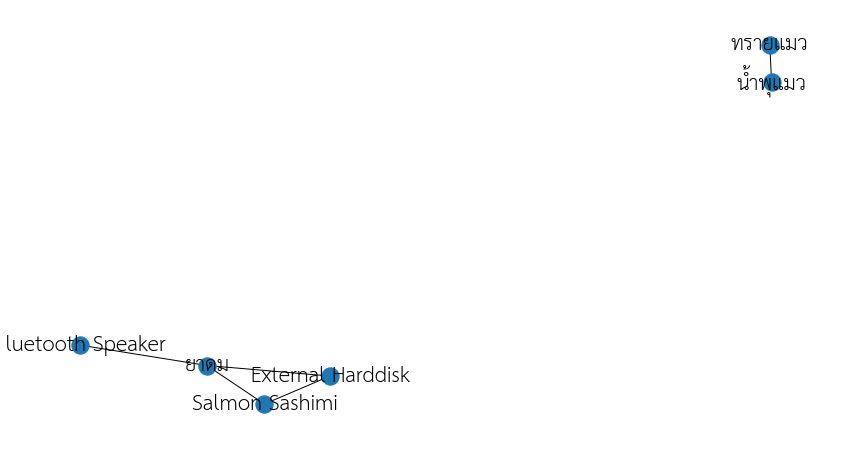

In [34]:
import matplotlib.pyplot as plt
import networkx as nx

fig, ax=plt.subplots(figsize=(15,8))
GA=nx.from_pandas_edgelist(links_filtered,source='item',target='related item')
nx.draw(GA,with_labels=True, font_size =20 , font_family='TH Sarabun New')
plt.show()

In [32]:
links_filtered.sort_values(by='value', ascending=False).head(10)

,item,related item,value
578,ทรายแมว,น้ำพุแมว,0.912871
734,น้ำพุแมว,ทรายแมว,0.912871
1552,ยาดม,Salmon Sashimi,0.883191
1318,Salmon Sashimi,ยาดม,0.883191
478,Bluetooth Speaker,ยาดม,0.834622
1531,ยาดม,Bluetooth Speaker,0.834622
1555,ยาดม,External Harddisk,0.82674
1438,External Harddisk,ยาดม,0.82674
1432,External Harddisk,Salmon Sashimi,0.816072
1315,Salmon Sashimi,External Harddisk,0.816072


## Product Recommendation

1. เมื่อลูกค้ามีการซื้อ ทรายแมว จะแนะนำให้ซื้อ น้ำพุแมว
2. เมื่อลูกค้ามีการซื้อ ยาดม จะแนะนำให้ซื้อ Bluetooth Speaker, External Harddisk
